## 1. SVM(서포트 벡터 머신)
201p
- 분류, 예측 모두 사용
- 정규화 필요
- 예측 정확도가 높음
- 고차원, 저차원에 모두 잘 작동
- 범주형 변수를 독립변수로 사용할 수 없어 더미변환

<단점>
- 과대적합, 과소적합을 피하기 위해서는 매개변수 설정이 필요(파라미터값 조정)
- 모델의 해석이 어렵다
- 대용량 데이터 구축시 속도가 느리며 과적합, 이상치에 민감
- 과적합과 이상치에 민감

<파라미터>
- C : 항상 양수여야함

## 1-1. 분류(LinearSVC)

- 패키지 임포트

In [1]:
#시험전에 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


- 데이터 가져오기

In [2]:
data1=pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
data1['target']=load_breast_cancer().target
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
X1=data1.iloc[:, :-1]
y1=data1[['target']]

In [4]:
#스케일에 민감, 정규화 필요
scaler = StandardScaler()
X1_scaled=scaler.fit_transform(X1)

In [5]:
#train/test분리
X1_train, X1_test, y1_train, y1_test=train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

#모델생성
svc=LinearSVC(random_state=42)
svc.fit(X1_train, y1_train)
pred=svc.predict(X1_test)

#정확도
score=accuracy_score(y1_test, pred)
score

0.956140350877193

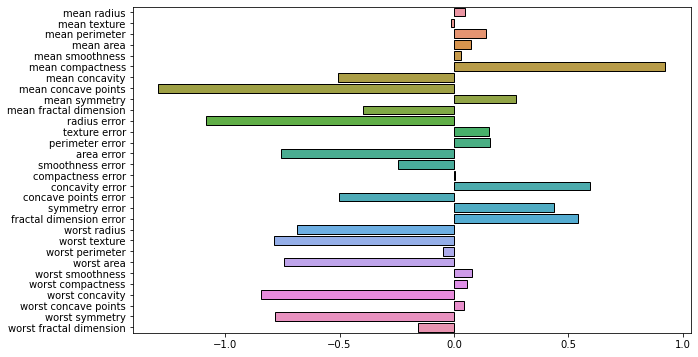

In [6]:
#변수중요도 : 모델명.coef_.tolist()[0]
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=svc.coef_.tolist()[0], edgecolor=(0,0,0))
plt.show()

In [7]:
svc=SVC(random_state=42, kernel='poly')
svc.fit(X1_train, y1_train)
pred=svc.predict(X1_test)
accuracy_score(y1_test, pred)
#->LinearSVC가 더 성능이 좋다

0.868421052631579

## 1-2. 회귀(SVR)

In [8]:
data2=pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
data2['target']=load_boston().target

data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
X2=data2.iloc[:, :-1]
y2=data2[['target']]

In [10]:
scaler=StandardScaler()
X2_scale=scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test=train_test_split(X2_scale, y2, test_size=0.2, random_state=42)

In [11]:
svr=SVR()
svr.fit(X2_train, y2_train)
pred=svr.predict(X2_test)
mse=mean_squared_error(y2_test, pred)
mse

25.693036656663224

## 2. 의사결정나무
p231

<장점>
- 결과를 설명하기 용이하다.
- 모형을 만드는 방법이 간단하다.
- 대용량 데이터에 빠르게 만들 수 있다.
- 비정상 잡음에 대해서도 민감함 없이 분류가 가능(전처리 과정에 모델의 성능이 큰 영향을 받지 않음)
- 상관성이 높은 변수에도 크게 영향x
- 스케일링 작업이 필요하지 않다.

<단점>
- 과대적합 가능성이 높다.
- 분류 경계선 부근의 자료값에 대해 오차가 크다.
- 설명변수 간의 중요도를 판단하기 쉽지 않다.

## 2-1. 분류(DecisionTreeClassifier)

In [12]:
X1_train, X1_test, y1_train, y2_test = train_test_split(X1_scaled,y1, test_size=0.2, random_state=42)

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X1_train, y1_train)
pred=dtc.predict(X1_test)
accuracy_score(y1_test, pred)

0.9473684210526315

<AxesSubplot:>

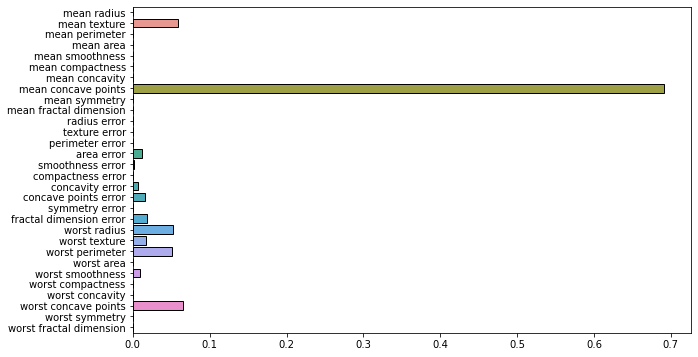

In [13]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=dtc.feature_importances_, edgecolor=(0,0,0))

## 2-2. 회귀(DecisionTreeRegressor)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X2_scale, y2, test_size=0.2, random_state=42)

dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
pred=dtr.predict(X_test)

mean_squared_error(y_test, pred)

10.416078431372549

## 3. 앙상블(부스팅) - GradientBoosting
- 부스팅은 예측력이 약한 모형들을 순차적으로 학습시켜 강한 예측모형을 만듬. 예측하면서 잘못 예측한 데이터에 대해 가중치를 부여해 오류를 개선해나가며 학습. 
- GradientBoosting(GBM)은 가중치 업데이트에 Gradient Descent(경사하강법)을 이용
- 정의된 손실함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습 진행

<장점>
- 배깅에 비해 모델의 장점을 최적화하고 Train데이터에 대해 오류가 적은 결합모델을 생성할 수 있음

<단점>
- 과적합 위험성

## 3-1. 분류(GradientBoostingClassifier)

In [15]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X1_train, y1_train)
pred=gbc.predict(X1_test)
accuracy_score(y1_test, pred)

0.956140350877193

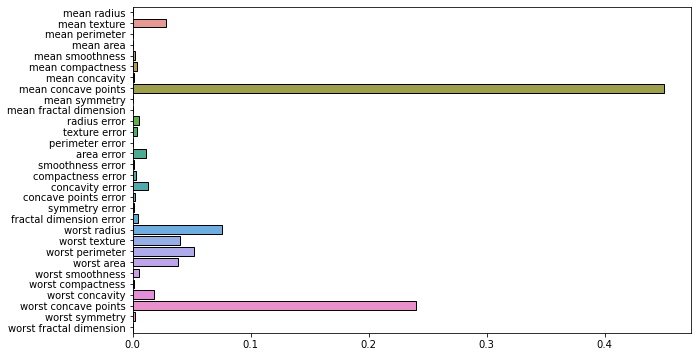

In [16]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=gbc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 3-2. 회귀(GradientBoostingRegressor)

In [17]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X2_train, y2_train)
pred=gbr.predict(X2_test)
#mean_squared_error(y2_test, pred)
#자꾸오류남 이유는?

## 4. 앙상블(부스팅) - XGBoost
- GBM을 기반으로함, 느린 수행시간 및 과적합 규제 부재 등의 문제를 해결하였다.
- 특히 병렬 CPU 환경에서 병렬학습이 가능해 기존 GBM보다 빠르게 학습 가능

<장점>
- 뛰어난 예측 성능
- GBM대비 빠른 수행 시간
- 과적합 규제
- 나무 가지치기 : 가지치기로 긍정 이득이 더 이상 없는 분할은 분할 수를 줄이는 장점
- 자체 내장된 교차 검증
- 결손값 자체 처리

## 4-1. 분류(XGBClassifier)

In [18]:
xgbc=XGBClassifier(random_state=42)
xgbc.fit(X1_train, y1_train)
pred=xgbc.predict(X1_test)

[00:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
accuracy_score(y1_test, pred)

0.956140350877193

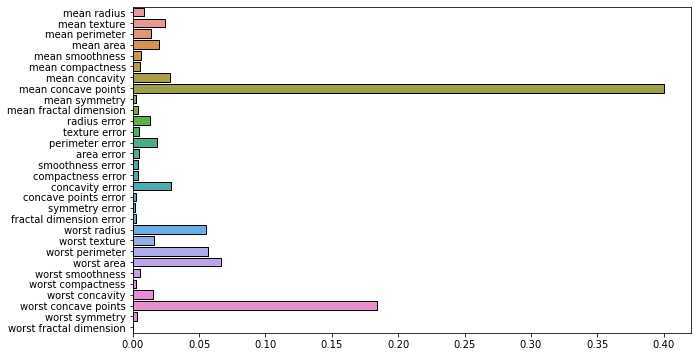

In [20]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=xgbc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 4-2. 회귀(XGBRegressor)

In [24]:
xgbr = XGBRegressor(random_state = 42)
xgbr.fit(X2_train, y2_train)
pred = xgbr.predict(X2_test)

mean_squared_error(y2_test, pred)

ValueError: Found input variables with inconsistent numbers of samples: [114, 102]